In [1]:
# Import the necessary packages to perform the data analysis

# packages to process and visualize the data
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# packages to improve visual description and analysis
from IPython.core import display as ICD
pd.set_option('display.max_columns', 100)
import os

Import the dataset of top 2000 companies

In [2]:
path='./data/'

In [3]:
panama_docs=[]
GDP_docs=[]
for i in os.listdir(path):
    if i[:13]=='panama_papers':
        panama_docs.append(i)
    if i[:10]=='API_NY.GDP':
        GDP_docs.append(i)

In [4]:
df_edges_raw = pd.read_csv(path + panama_docs[0],low_memory=False)
df_address_raw = pd.read_csv(path + panama_docs[1],low_memory=False)
df_entity_raw = pd.read_csv(path + panama_docs[2],low_memory=False)
df_intermediary_raw = pd.read_csv(path + panama_docs[3],low_memory=False)
df_officier_raw = pd.read_csv(path + panama_docs[4],low_memory=False)

In [5]:
df_GDP_tot_raw=pd.read_csv(path + GDP_docs[0],skiprows=4,low_memory=False)
df_GDP_cap_raw=pd.read_csv(path + GDP_docs[1],skiprows=4,low_memory=False)

**1) Map the tax heavens jurisdiction in terms of the number of entities they have registered**

In [6]:
df_entity_raw['jurisdiction_description'].unique()

array(['Samoa', 'Panama', 'Nevada', 'United Kingdom', 'Singapore',
       'Ras Al Khaimah', 'Isle Of Man', 'British Anguilla', 'Seychelles',
       'Niue', 'Uruguay', 'British Virgin Islands', 'Hong Kong',
       'New Zealand', 'Bahamas', 'Cyprus', 'Malta', 'Belize', 'Jersey',
       'Wyoming', 'Costa Rica'], dtype=object)

In [7]:
threshold1=1000
df_entity_S1=df_entity_raw.copy()
vc=df_entity_S1.jurisdiction_description.value_counts()
tax_heavens_L=list(vc[vc > threshold1].index)
tax_heavens_S=list(vc[vc <= threshold1].index)
df_entity_S1.loc[~df_entity_S1.jurisdiction_description.isin(tax_heavens_L), 'jurisdiction_description'] = 'Others'
df_entity_S1.jurisdiction_description.value_counts()

British Virgin Islands    113648
Panama                     48360
Bahamas                    15915
Seychelles                 15182
Niue                        9611
Samoa                       5307
British Anguilla            3253
Nevada                      1260
Others                      1098
Name: jurisdiction_description, dtype: int64

Countries in Others category are:  ['Hong Kong', 'United Kingdom', 'Belize', 'Costa Rica', 'Cyprus', 'Uruguay', 'New Zealand', 'Jersey', 'Wyoming', 'Malta', 'Isle Of Man', 'Ras Al Khaimah', 'Singapore']


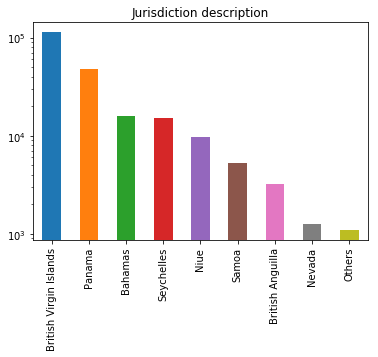

In [8]:
df_entity_S1.jurisdiction_description.value_counts().plot(kind='bar',title='Jurisdiction description', logy=True)
print('Countries in Others category are: ',tax_heavens_S)

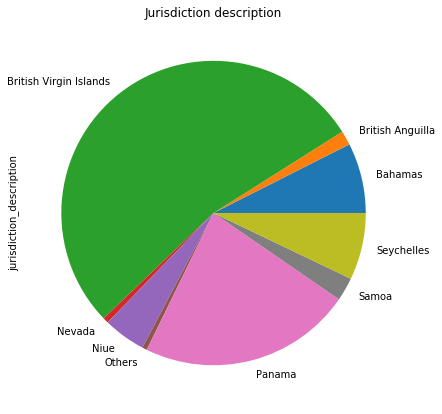

In [9]:
df_entity_S1.jurisdiction_description.value_counts().sort_index().plot(kind='pie', figsize=(7, 7), title='Jurisdiction description')

**2) Map countries in the world according to how much they appear in the Panama Papers in terms of the entities**

In [10]:
df_entity_raw['countries'].unique()

array(['Hong Kong', 'Taiwan', 'China', 'Switzerland', 'Singapore',
       'Brazil', 'Panama', 'Samoa', 'Liechtenstein', 'Spain', 'Thailand',
       'Colombia', 'Jersey', 'Andorra', 'Seychelles', 'Ireland',
       'Belgium', 'Israel', 'Gibraltar', 'Guernsey',
       'United Arab Emirates', 'Cyprus', 'Venezuela', 'Isle of Man',
       'Lebanon', 'Denmark', 'Uruguay', 'Jordan', 'Bahamas',
       'United Kingdom', nan, 'Belize', 'Luxembourg', 'Ecuador',
       'Guatemala', 'Germany', 'Mauritius', 'Turkey', 'United States',
       'Monaco', 'Estonia', 'Niue', 'Czech Republic', 'Netherlands',
       'Hungary', 'Costa Rica', 'Portugal', 'Cayman Islands',
       'South Africa', 'Malta', 'New Zealand', "Côte d'Ivoire",
       'Dominican Republic', 'France', 'Italy', 'Canada', 'Russia',
       'Greece', 'Saudi Arabia', 'Qatar', 'Mexico', 'Peru', 'Bermuda',
       'El Salvador', 'Australia', 'Saint Kitts and Nevis', 'Argentina',
       'Japan', 'Austria', 'American Samoa', 'Paraguay', 'Chile', 'E

In [11]:
threshold2=3000
vc=df_entity_S1.countries.value_counts()
tax_evasions_L=list(vc[vc > threshold2].index)
tax_evasions_S=list(vc[vc <= threshold2].index)
df_entity_S1.loc[~df_entity_S1.countries.isin(tax_evasions_L), 'countries'] = 'Others'
df_entity_S1.countries.value_counts()

Switzerland             37911
Hong Kong               37911
Others                  36495
Panama                  15811
Jersey                  14331
Luxembourg              10840
United Kingdom           9619
Guernsey                 7327
United Arab Emirates     7269
Bahamas                  4984
Uruguay                  4906
Isle of Man              4892
Russia                   4197
Singapore                4081
Cyprus                   3613
China                    3213
Monaco                   3168
United States            3066
Name: countries, dtype: int64

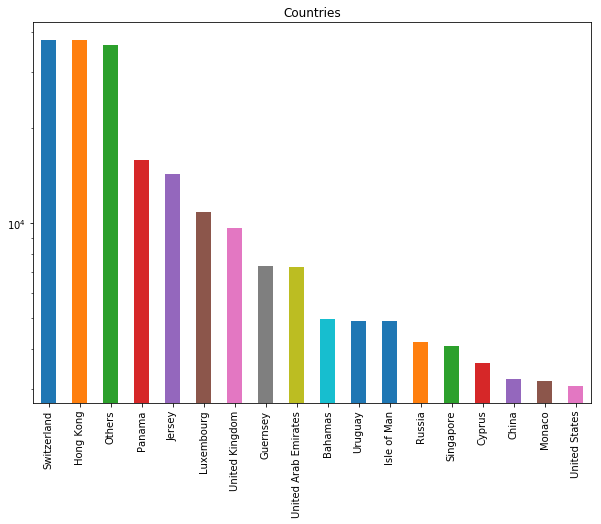

In [12]:
df_entity_S1.countries.value_counts().plot(kind='bar',title='Countries', figsize=(10, 7), logy=True)

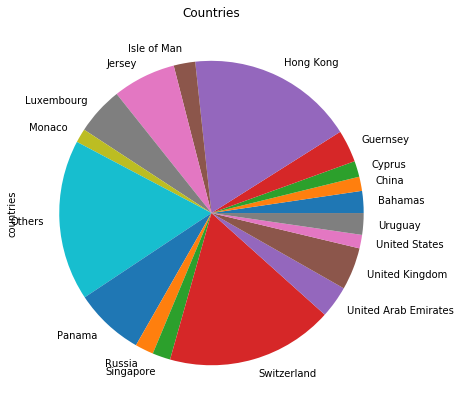

In [13]:
df_entity_S1.countries.value_counts().sort_index().plot(kind='pie', figsize=(7, 7), title='Countries')

**3)GDP Analysis**

In [14]:
df_GDP_tot_raw

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330168e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,2.516000e+09,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.249735e+10,1.418895e+10,1.964085e+10,2.823371e+10,4.178948e+10,6.044892e+10,8.417804e+10,7.549239e+10,8.252614e+10,1.041160e+11,1.139230e+11,1.249130e+11,1.267300e+11,1.026210e+11,9.533720e+10,1.242090e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924242e+09,1.965385e+09,2.173750e+09,2.156625e+09,2.126000e+09,2.335125e+09,2.101625e+09,1.139167e+09,7.094526e+08,1.228071e+09,1.985674e+09,2.424499e+09,3.314898e+09,2.359903e+09,2.707124e+09,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
5,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.575266e+10,2.842535e+10,3.137573e+10,3.641557e+10,4.330257e+10,5.500127e+10,1.051130e+11,1.163010e+11,1.448010e+11,1.672560e+11,1.834980e+11,2.485690e+11,3.380720e+11,3.484840e+11,3.242280e+11,3.038680e+11,3.078450e+11,3.037990e+11,2.889390e+11,3.125840e+11,3.074070e+11,3.222250e+11,4.467380e+11,4.396420e+11,4.710170e+11,4.763650e+11,4.873750e+11,5.233570e+11,5.780120e+11,6.128960e+11,5.906930e+11,6.431480e+11,7.347680e+11,7.232830e+11,7.290520e+11,8.231110e+11,9.638620e+11,1.184660e+12,1.404110e+12,1.637570e+12,2.078120e+12,1.795820e+12,2.109550e+12,2.501300e+12,2

In [15]:
print(df_GDP_tot_raw['2017'].isna().sum())
print(df_GDP_tot_raw['2016'].isna().sum())
print(df_GDP_tot_raw['2015'].isna().sum())
print(df_GDP_tot_raw['2014'].isna().sum())
print(df_GDP_tot_raw['2013'].isna().sum())
print(df_GDP_tot_raw['2012'].isna().sum())

30
23
18
9
16
17


In [16]:
df_GDP_tot=df_GDP_tot_raw[['Country Name','2014']].copy()
df_GDP_tot.columns = ['countries', 'GDP_tot']
df_GDP_tot

,countries,GDP_tot
0,Aruba,2.516000e+09
1,Afghanistan,2.061610e+10
2,Angola,1.267300e+11
3,Albania,1.322824e+10
4,Andorra,3.350736e+09
5,Arab World,2.906920e+12
6,United Arab Emirates,4.031370e+11
7,Argentina,5.263200e+11
8,Armenia,1.160951e+10
9,American Samoa,6.430000e+08


In [17]:
df_vc=pd.DataFrame(df_entity_raw.countries.value_counts())
df_vc.reset_index(level=0, inplace=True)
df_vc.columns = ['countries', 'n_companies']
df_vc

,countries,n_companies
0,Switzerland,37911
1,Hong Kong,37911
2,Panama,15811
3,Jersey,14331
4,Luxembourg,10840
5,United Kingdom,9619
6,Guernsey,7327
7,United Arab Emirates,7269
8,Bahamas,4984
9,Uruguay,4906


In [19]:
df_GDP_tot_entities=df_GDP_tot.merge(df_vc, how='inner',left_on='countries', right_on='countries')
df_GDP_tot_entities

,countries,GDP_tot,n_companies
0,Aruba,2.516000e+09,27
1,Angola,1.267300e+11,10
2,Albania,1.322824e+10,2
3,Andorra,3.350736e+09,489
4,United Arab Emirates,4.031370e+11,7269
5,Argentina,5.263200e+11,270
6,American Samoa,6.430000e+08,1
7,Antigua and Barbuda,1.280133e+09,21
8,Australia,1.464960e+12,94
9,Austria,4.418850e+11,24
